In [16]:
%pip install pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv("C:\\Users\\Taiye Fagbolade\\Downloads\\learning folder\\Employment_Unemployment_GDP_data.csv")
df.head()

,Country Name,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD)
0,Albania,1991,53.299533,12.172764,34.527781,10.304,1.099559e+09
1,Algeria,1991,24.118566,25.067734,50.813700,20.600,4.571568e+10
2,Angola,1991,40.071857,8.163345,51.764822,16.855,1.060378e+10
3,Argentina,1991,13.669999,28.505903,57.824098,5.440,1.897200e+11
4,Armenia,1991,54.263252,15.790454,29.946294,1.783,2.069870e+09


1. Data Exploration with pandas.

In [4]:
# Top five (5) countries by average GPP

top_gdp = df.groupby('Country Name') ['GDP (in USD)'].mean().sort_values(ascending=False).head(5)
print ("Top five(5) countries by average GDP:\n", top_gdp)

Top five(5) countries by average GDP:
 Country Name
United States     1.397386e+13
China             5.978173e+12
Japan             4.858619e+12
Germany           3.064907e+12
United Kingdom    2.254127e+12
Name: GDP (in USD), dtype: float64


In [5]:
df.columns

Index(['Country Name', 'Year', 'Employment Sector: Agriculture',
       'Employment Sector: Industry', 'Employment Sector: Services',
       'Unemployment Rate', 'GDP (in USD)'],
      dtype='object')

In [6]:
employment_cols = ['Employment Sector: Agriculture', 'Employment Sector: Services']
top_employment = df[df['Country Name'].isin(top_gdp.index)][['Country Name', 'Year'] + employment_cols] 
avg_employment = top_employment.groupby('Country Name') [employment_cols].mean()
print("\nAverage Employment Distribution:\n", avg_employment)


Average Employment Distribution:
                 Employment Sector: Agriculture  Employment Sector: Services
Country Name                                                               
China                                40.672446                    33.045893
Germany                               2.172276                    66.731458
Japan                                 4.400777                    67.020547
United Kingdom                        1.412435                    76.070993
United States                         2.009000                    76.639468


Obsservation: These top five (5) by average GDP above, show low agriculture, moderate industry, and high services employment which is typical of advance economies. 

2. Employment Shift Visualization (Nigeria Example)

<function matplotlib.pyplot.show(close=None, block=None)>

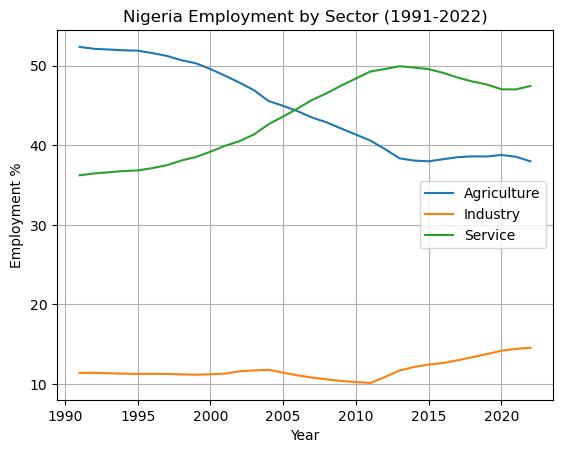

In [7]:
Nigeria = df[df['Country Name'] == 'Nigeria']

plt.Figure(figsize=(10,6))
plt.plot(Nigeria['Year'], Nigeria['Employment Sector: Agriculture'], label='Agriculture')
plt.plot(Nigeria['Year'], Nigeria['Employment Sector: Industry'], label='Industry')
plt.plot(Nigeria['Year'], Nigeria['Employment Sector: Services'], label='Service')
plt.title('Nigeria Employment by Sector (1991-2022)')
plt.xlabel('Year')
plt.ylabel('Employment %')
plt.legend()
plt.grid(True)
plt.show

3. Correlation Analysis

In [8]:
corr_df = df[['GDP (in USD)', 'Unemployment Rate', 'Employment Sector: Services']]
corr_matrix = corr_df.corr()
print("Coorrelation Matrix:\n", corr_matrix)

Coorrelation Matrix:
                              GDP (in USD)  Unemployment Rate  \
GDP (in USD)                     1.000000          -0.065154   
Unemployment Rate               -0.065154           1.000000   
Employment Sector: Services      0.167855           0.209609   

                             Employment Sector: Services  
GDP (in USD)                                    0.167855  
Unemployment Rate                               0.209609  
Employment Sector: Services                     1.000000  


Insight: Employment in services is most positively correlated with GDP, suggesting that service-driven economies tends to have higher GDPs

4. Global Crisis Analysis

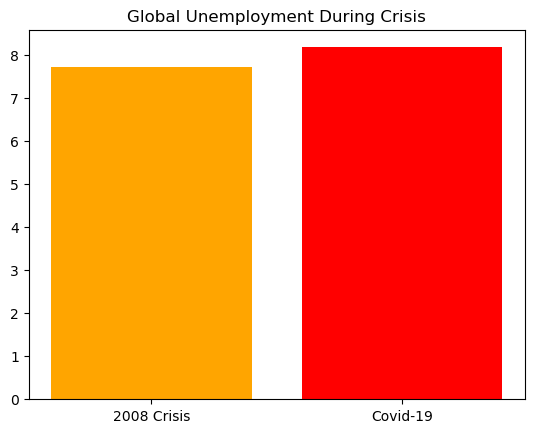

In [9]:
# Filtering for crisis periods
crisis_2008 = df[df['Year'].between(2007, 2009)]
crisis_covid = df[df['Year'].between(2020, 2021)]

# Global average unemployment
avg_unemp_2008 = crisis_2008['Unemployment Rate'].mean()
avg_unemp_covid = crisis_covid['Unemployment Rate'].mean()

# Bar chart
plt.bar(['2008 Crisis', 'Covid-19'], [avg_unemp_2008, avg_unemp_covid], color=['orange', 'red'])
plt.title('Global Unemployment During Crisis')
plt.ylabel
plt.show()


Conclusion: COVID-19 had stronger impact on global unemployment than the 2008 financial crisis.

5. Time Series Insight (Nigeria Example)

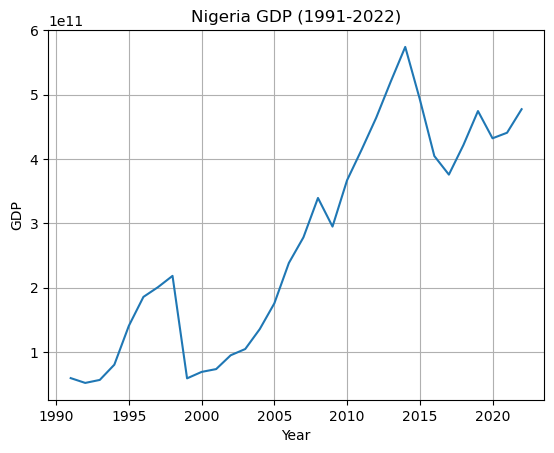

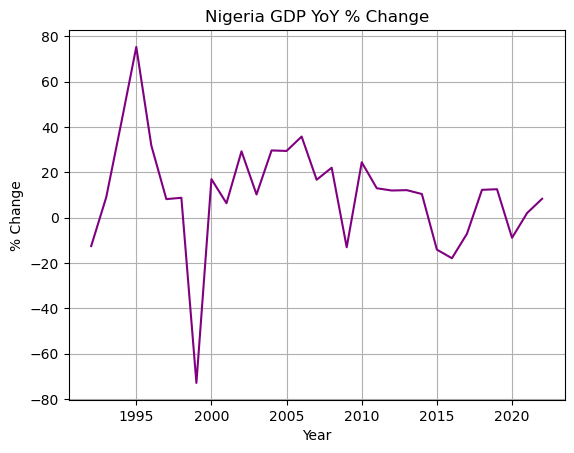

In [10]:
nigeria = df[df['Country Name'] == 'Nigeria'].copy()
nigeria['GDP YoY % Change'] = nigeria['GDP (in USD)'].pct_change() * 100

# GDP over time
plt.plot(nigeria['Year'], nigeria['GDP (in USD)'], label='GDP (in USD)')
plt.title('Nigeria GDP (1991-2022)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

# YoY % change
plt.plot(nigeria['Year'], nigeria['GDP YoY % Change'], color='purple')
plt.title('Nigeria GDP YoY % Change')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.grid(True)
plt.show()


Visualisation above shows periods around 2016 experience a sharp decline in GDP, likely due to oil price collapse and recession.

6. Interactive Visualization with Plotly Express. 

In [11]:

%pip install pycountry



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pycountry

print(pycountry.countries.get(name='Nigeria'))

Country(alpha_2='NG', alpha_3='NGA', flag='🇳🇬', name='Nigeria', numeric='566', official_name='Federal Republic of Nigeria')


In [13]:
# add ISO Alpha-3 country codes

def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None
    
# add country code column
df['Country Code'] = df['Country Name'].apply(get_country_code)

# Drop rows with missing codes
df = df.dropna(subset=['Country Code'])

In [14]:
df.head()

,Country Name,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD),Country Code
0,Albania,1991,53.299533,12.172764,34.527781,10.304,1.099559e+09,ALB
1,Algeria,1991,24.118566,25.067734,50.813700,20.600,4.571568e+10,DZA
2,Angola,1991,40.071857,8.163345,51.764822,16.855,1.060378e+10,AGO
3,Argentina,1991,13.669999,28.505903,57.824098,5.440,1.897200e+11,ARG
4,Armenia,1991,54.263252,15.790454,29.946294,1.783,2.069870e+09,ARM


In [15]:
# create animated choropleth map

fig = px.choropleth (df,
                     locations= 'Country Code',
                     color='GDP (in USD)', 
                     hover_name='Country Name', 
                     animation_frame='Year',
                     color_continuous_scale='Viridis',
                     title='Global GDP Evolution (1991-2022)')
fig.show()